In [1]:
import numpy as np
import pandas as pd

In [2]:
d = pd.read_csv('pca_data.csv', header = None)

In [3]:
d

,0,1
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


In [4]:
d_np = d.values

In [5]:
d_np

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

PCA에서는 원데이터를 그대로 사용하지 않고, 각 feature에 대해서 mean centering 해준 값을 사용한다.

In [6]:
m = d_np.mean(axis = 0) # get mean of each column

In [7]:
m

array([1.81, 1.91])

In [8]:
centered_d = d_np - m

In [9]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [10]:
cov_m = np.cov(centered_d.T)

In [11]:
cov_m

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

원 데이터가 가지고 있는 전체 분산은 각 feature의 분산의 합

In [12]:
np.diag(cov_m)

array([0.61655556, 0.71655556])

In [13]:
np.diag(cov_m)[0]+np.diag(cov_m)[1]

1.3331111111111111

## 직접 구해보기 (optional)

In [18]:
m = d_np.mean(axis = 0) # get mean of each column

In [19]:
m

array([1.81, 1.91])

In [20]:
centered_d = d_np - m

In [21]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [53]:
pre_cov = centered_d.T.dot(centered_d) # get the coveriance matrix

In [54]:
pre_cov

array([[5.549, 5.539],
       [5.539, 6.449]])

In [55]:
d_np.shape

(10, 2)

In [56]:
cov_m = pre_cov/(d_np.shape[0]-1)

In [57]:
cov_m

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

# 고유분해 하기

In [14]:
eigvalues, eigvectors = np.linalg.eig(cov_m)

In [15]:
eigvalues

array([0.0490834 , 1.28402771])

In [15]:
np.sum(eigvalues)#1.28402771+0.0490834

1.3331111111111111

In [16]:
1.28402771/(1.28402771+0.0490834)

0.9631813135215713

In [17]:
eigvalues[0]+eigvalues[1]

1.3331111111111111

In [16]:
eigvectors # It is important to notice that these eigenvectors are both unit eigenvectors ie. their lengths are both 1.

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

## 시각화 해 보기

In [17]:
import matplotlib.pyplot as plt

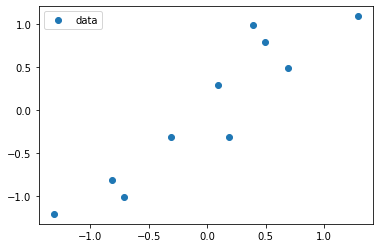

In [18]:
plt.plot(centered_d[:, 0], centered_d[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

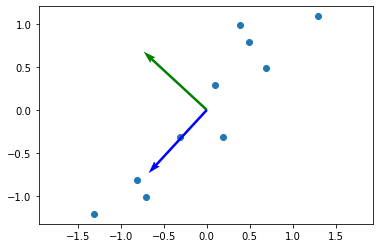

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_d[:, 0], centered_d[:, 1]) 
ax.quiver((0,0), (0,0), eigvectors[0,:], eigvectors[1,:],color=['g','b'], units = 'xy', scale = 1)
# quiver가 작동하는 방식 참고
# https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
plt.axis('equal')
# plt.xticks(range(-2,2))
# plt.yticks(range(-2,2))
# plt.grid()
plt.show()

In [21]:
eigvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [27]:
eigvectors[:,0] 
# 위에서 초록색을 의미

array([-0.73517866,  0.6778734 ])

In [28]:
eigvectors[:,1]
# 위에서 파란색을 의미

array([-0.6778734 , -0.73517866])

## PC를 사용해서 새로운 데이터 구축하기

component를 하나만 사용하는 경우

In [42]:
F = eigvectors[:,1]

In [43]:
F

array([-0.6778734 , -0.73517866])

In [31]:
F.shape

(2,)

In [41]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [32]:
new_data = np.dot(centered_d, F)

In [33]:
new_data

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

In [34]:
np.corrcoef(d_np[:,0], new_data)

array([[ 1.        , -0.97824961],
       [-0.97824961,  1.        ]])

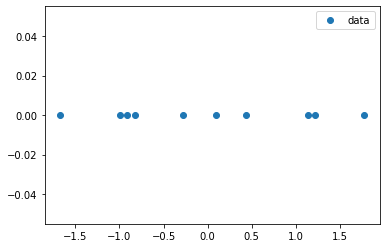

In [35]:
plt.plot(new_data,np.zeros(10), 'o', label = 'data')
plt.legend()
plt.show()

component를 둘 모두 사용하는 경우

In [36]:
F2 = np.array([eigvectors[:,1],eigvectors[:,0]])

In [37]:
F2

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [38]:
new_data2 = np.dot(centered_d, F2)

In [39]:
new_data2

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

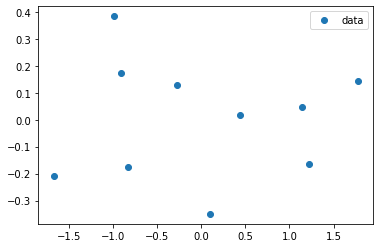

In [40]:
plt.plot(new_data2[:, 0], new_data2[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=1)

In [46]:
pca.fit_transform(d_np)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])